In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import math
%matplotlib inline

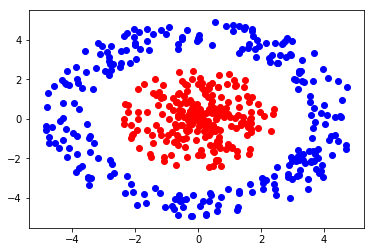

In [9]:
np.random.seed(0)

def make_dataset(num_points):
    radius = 5
    data = []
    labels = []
    # Generate positive examples (labeled 1).
    for i in range(num_points // 2):
        r = np.random.uniform(0, radius*0.5)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(1)
        
    # Generate negative examples (labeled 0).
    for i in range(num_points // 2):
        r = np.random.uniform(radius*0.7, radius)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(0)
        
    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels
    
num_data = 500
data, labels = make_dataset(num_data)

# Note: red indicates a label of 1, blue indicates a label of 0
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue')  

In [10]:
# First, initialize our neural network parameters.
params = {}
params['U'] = np.random.randn(3, 2)
params['b'] = np.zeros(3)
params['W'] = np.random.randn(3)
params['c'] = 0

# Notice we make use of numpy's broadcasting when adding the bias b.
def forward(X, params):    
    G = np.dot(X, params['U'].T)  + params['b']
    H = np.tanh(G)
    z = np.dot(H, params['W'].T) + params['c']
    y = sigmoid(z)
    
    return y

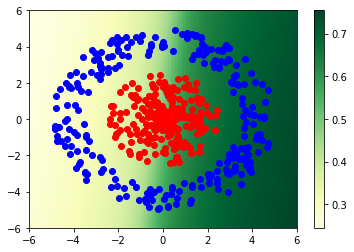

In [11]:
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue')

In [12]:
def backprop(X, t, params):
    N = X.shape[0]
    
    # Perform forwards computation.
    G = np.dot(X, params['U'].T)  + params['b']
    H = np.tanh(G)
    z = np.dot(H, params['W'].T) + params['c']
    y = sigmoid(z)
    loss = (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    
    # Perform backwards computation.
    E_bar = 1
    z_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T, z_bar)
    c_bar = np.dot(z_bar, np.ones(N))
    H_bar = np.outer(z_bar, params['W'].T)
    G_bar = H_bar * (1 - np.tanh(G)**2)
    U_bar = np.dot(G_bar.T, X)
    b_bar = np.dot(G_bar.T, np.ones(N))
    
    # Wrap our gradients in a dictionary.
    grads = {}
    grads['U'] = U_bar
    grads['b'] = b_bar
    grads['W'] = W_bar
    grads['c'] = c_bar
    
    return grads, loss

In [13]:
num_steps = 1000
alpha = 1
for step in range(num_steps):        
    grads, loss = backprop(data, labels, params)
    for k in params:
        params[k] -= alpha * grads[k]

    # Print loss every so often.
    if step % 50 == 0:
        print("Step {:3d} | Loss {:3.2f}".format(step, loss))

Step   0 | Loss 0.75
Step  50 | Loss 0.43
Step 100 | Loss 0.35
Step 150 | Loss 0.16
Step 200 | Loss 0.11
Step 250 | Loss 0.09
Step 300 | Loss 0.07
Step 350 | Loss 0.06
Step 400 | Loss 0.06
Step 450 | Loss 0.05
Step 500 | Loss 0.05
Step 550 | Loss 0.05
Step 600 | Loss 0.04
Step 650 | Loss 0.04
Step 700 | Loss 0.04
Step 750 | Loss 0.04
Step 800 | Loss 0.04
Step 850 | Loss 0.04
Step 900 | Loss 0.04
Step 950 | Loss 0.03


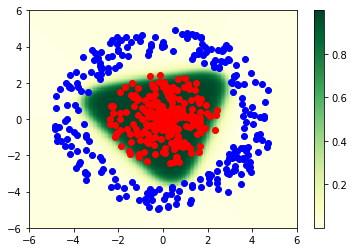

In [14]:
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 